1) Analyze customer data from a telecom provider and build machine learning models to 
predict churn.  
Dataset: Telco Customer Churn with 7,043 customer records.

Dataset: Telco Customer Churn (Kaggle)
•	7K telecom customer records with churn labels.


Initial Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

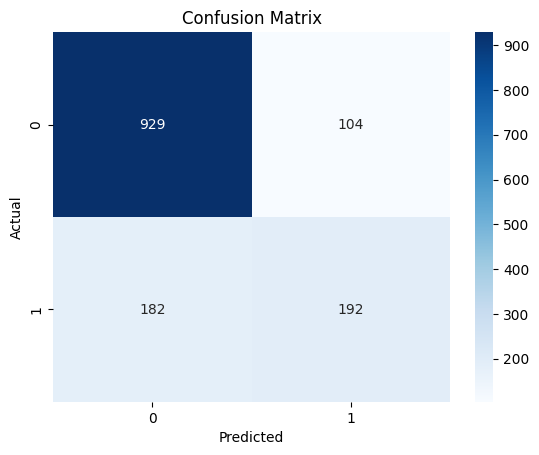

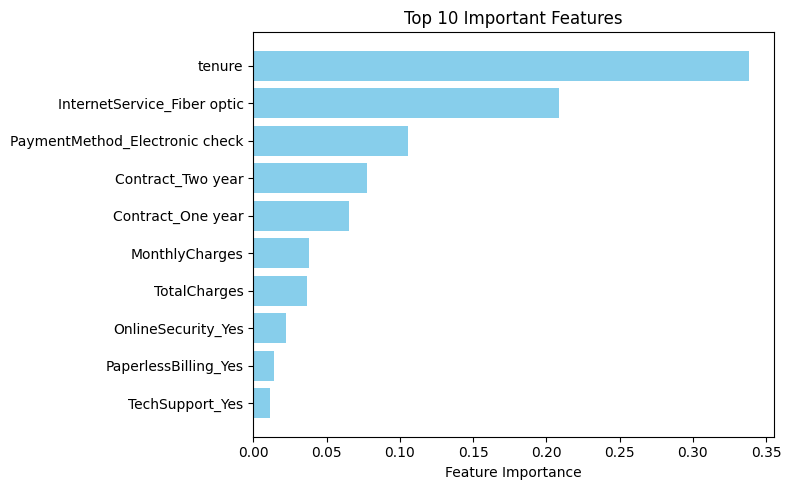

In [3]:
# 📊 Telco Customer Churn Prediction using Gradient Boosting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# --------------------------
# 1️⃣ Load and Inspect Data
# --------------------------
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Initial Shape:", df.shape)
print(df.head())
print(df.info())

# --------------------------
# 2️⃣ Data Cleaning
# --------------------------
# Convert 'TotalCharges' to numeric (it may contain spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Handle missing values
df = df.dropna()

# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop irrelevant columns
df = df.drop(columns=["customerID"])

# --------------------------
# 3️⃣ Feature Engineering
# --------------------------
# One-hot encode categorical variables
X = pd.get_dummies(df.drop(columns=["Churn"]), drop_first=True)
y = df["Churn"]

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTrain size:", X_train.shape, "Test size:", X_test.shape)

# --------------------------
# 4️⃣ Baseline Gradient Boosting Model
# --------------------------
base_model = GradientBoostingClassifier(random_state=42)
base_model.fit(X_train, y_train)

base_preds = base_model.predict_proba(X_test)[:, 1]
base_auc = roc_auc_score(y_test, base_preds)
print("\nBaseline ROC AUC:", round(base_auc, 4))

# --------------------------
# 5️⃣ Hyperparameter Tuning
# --------------------------
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
print("Best CV ROC AUC:", round(grid.best_score_, 4))

# --------------------------
# 6️⃣ Evaluate Tuned Model
# --------------------------
best_model = grid.best_estimator_

preds = best_model.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, preds)
print("\nTest ROC AUC:", round(roc, 4))

# Confusion Matrix and Classification Report
y_pred_class = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------------
# 7️⃣ Feature Importance Plot
# --------------------------
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(8,5))
plt.barh(range(10), importances[indices][::-1], color="skyblue")
plt.yticks(range(10), X.columns[indices][::-1])
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()



2) Apply parallel tree boosting algorithms (such as XGBoost, LightGBM, or CatBoost) to a 
real-world dataset to predict customer default behavior. Dataset: UCI Credit Card Default 
Dataset with 30,000 records.

CREDIT CARD DEFAULT PREDICTION - PARALLEL TREE BOOSTING

📁 Please ensure your dataset file is in the same directory.
   Expected file: 'default_credit_card.csv' or 'default_credit_card.xlsx'
   Or update the file path in the code below.

✓ Dataset loaded successfully from UCI_Credit_Card.csv!

Dataset Shape: (30000, 24)
Number of Records: 30,000
Number of Features: 23

DATASET OVERVIEW

First few rows:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     68

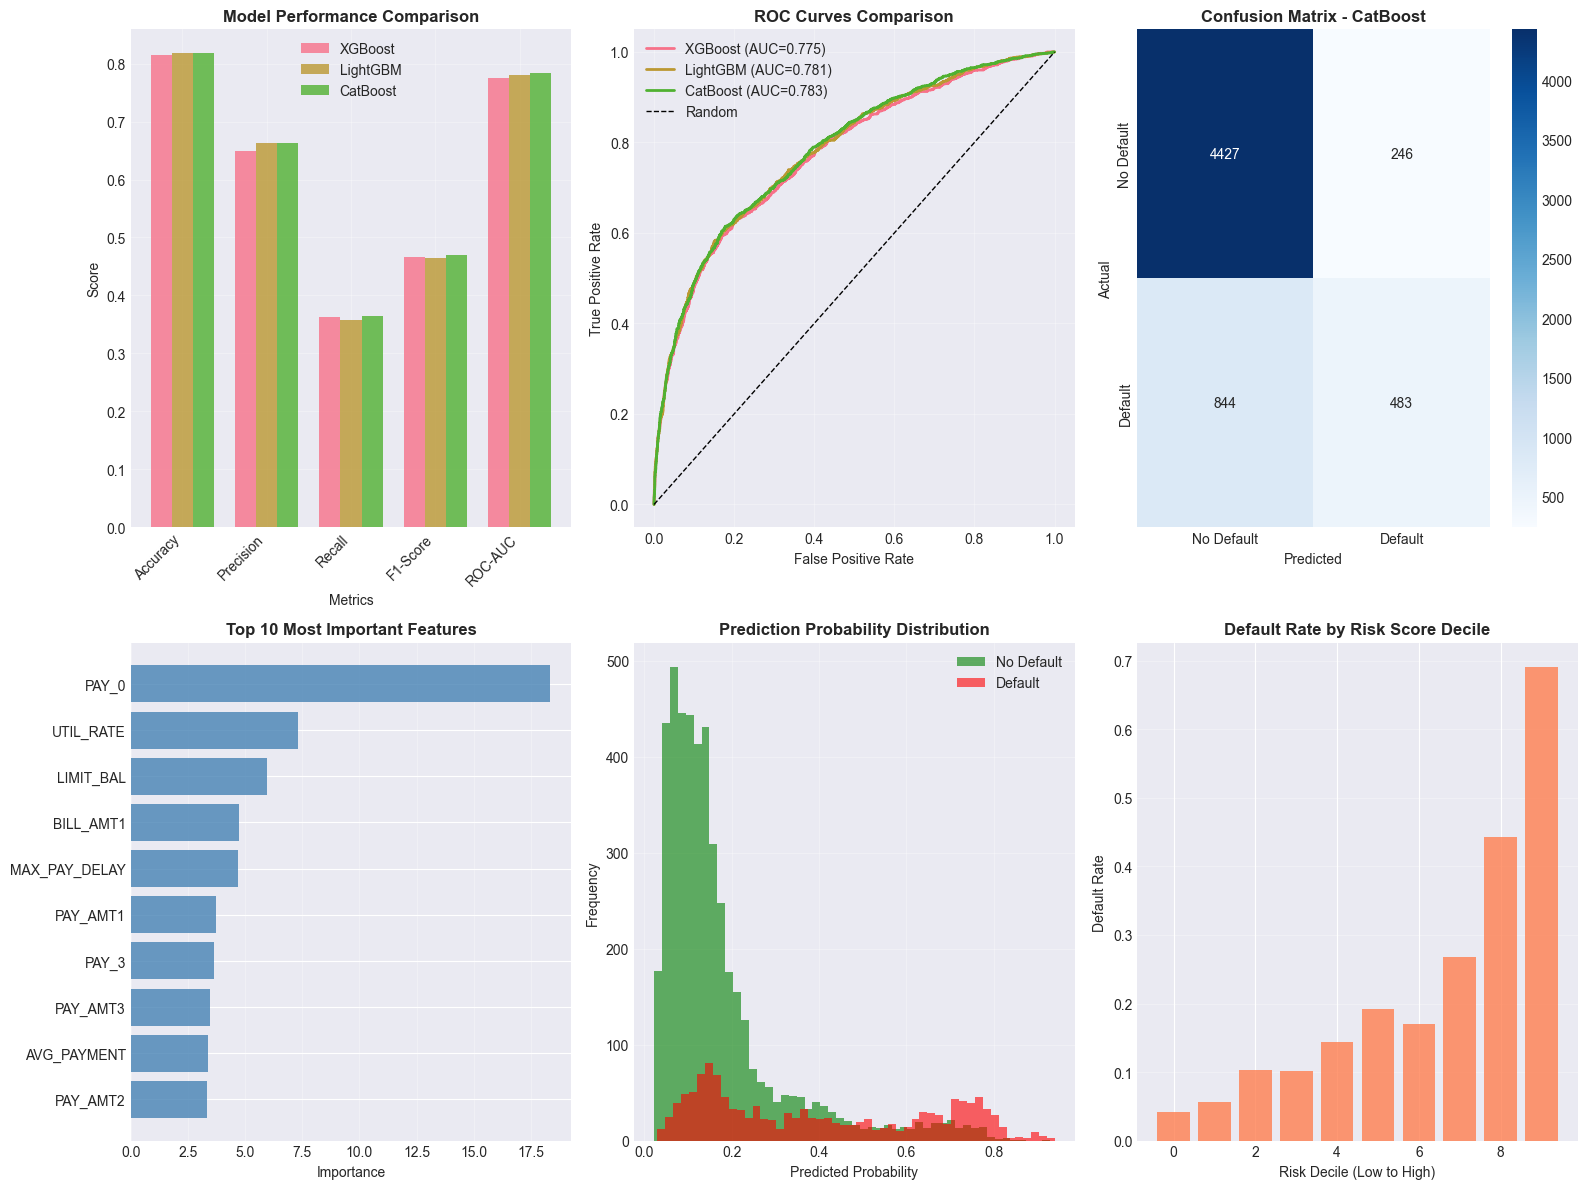


BUSINESS INSIGHTS & RECOMMENDATIONS

1. MODEL PERFORMANCE:
   - Best performing model: CatBoost
   - Can identify 36.4% of actual defaulters
   - Precision of 66.3% reduces false alarms

2. KEY RISK FACTORS:
   - Top risk indicators: PAY_0, UTIL_RATE, LIMIT_BAL

3. RECOMMENDATIONS:
   - Implement automated credit scoring using the best model
   - Focus collection efforts on high-risk score customers
   - Set credit limits based on predicted default probability
   - Monitor top risk factors for early warning signals

ANALYSIS COMPLETE!


In [6]:
"""
Credit Card Default Prediction using Parallel Tree Boosting Algorithms
Dataset: UCI Credit Card Default Dataset (30,000 records)
Algorithms: XGBoost, LightGBM, CatBoost
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. LOAD AND EXPLORE DATA
# ============================================================================

print("=" * 80)
print("CREDIT CARD DEFAULT PREDICTION - PARALLEL TREE BOOSTING")
print("=" * 80)

# Load the dataset
print("\n📁 Please ensure your dataset file is in the same directory.")
print("   Expected file: 'default_credit_card.csv' or 'default_credit_card.xlsx'")
print("   Or update the file path in the code below.\n")

# Try different file formats
file_loaded = False
for file_path in ['default_credit_card.csv', 'credit_card_default.csv', 
                  'default_credit_card.xlsx', 'UCI_Credit_Card.csv',
                  'default of credit card clients.xls']:
    try:
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
            df = pd.read_excel(file_path, header=1)
        
        # Check if ID column exists and drop it
        if 'ID' in df.columns:
            df = df.drop('ID', axis=1)
        
        print(f"✓ Dataset loaded successfully from {file_path}!")
        file_loaded = True
        break
    except FileNotFoundError:
        continue
    except Exception as e:
        print(f"⚠ Error loading {file_path}: {str(e)}")
        continue

if not file_loaded:
    print("\n⚠ Dataset file not found. Creating sample data for demonstration...")
    print("   To use real data: Save your CSV file as 'default_credit_card.csv'\n")
    # Create sample data matching the actual dataset structure
    np.random.seed(42)
    n_samples = 30000
    df = pd.DataFrame({
        'LIMIT_BAL': np.random.randint(10000, 800000, n_samples),
        'SEX': np.random.choice([1, 2], n_samples),
        'EDUCATION': np.random.choice([1, 2, 3, 4], n_samples),
        'MARRIAGE': np.random.choice([1, 2, 3], n_samples),
        'AGE': np.random.randint(21, 75, n_samples),
        'PAY_0': np.random.randint(-2, 9, n_samples),
        'PAY_2': np.random.randint(-2, 9, n_samples),
        'PAY_3': np.random.randint(-2, 9, n_samples),
        'PAY_4': np.random.randint(-2, 9, n_samples),
        'PAY_5': np.random.randint(-2, 9, n_samples),
        'PAY_6': np.random.randint(-2, 9, n_samples),
        'BILL_AMT1': np.random.randint(-10000, 500000, n_samples),
        'BILL_AMT2': np.random.randint(-10000, 500000, n_samples),
        'BILL_AMT3': np.random.randint(-10000, 500000, n_samples),
        'BILL_AMT4': np.random.randint(-10000, 500000, n_samples),
        'BILL_AMT5': np.random.randint(-10000, 500000, n_samples),
        'BILL_AMT6': np.random.randint(-10000, 500000, n_samples),
        'PAY_AMT1': np.random.randint(0, 100000, n_samples),
        'PAY_AMT2': np.random.randint(0, 100000, n_samples),
        'PAY_AMT3': np.random.randint(0, 100000, n_samples),
        'PAY_AMT4': np.random.randint(0, 100000, n_samples),
        'PAY_AMT5': np.random.randint(0, 100000, n_samples),
        'PAY_AMT6': np.random.randint(0, 100000, n_samples),
        'default.payment.next.month': np.random.choice([0, 1], n_samples, p=[0.78, 0.22])
    })

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1] - 1}")

# Display basic information
print("\n" + "=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print("\nFirst few rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum().sum(), "missing values")

# Target variable distribution
print("\n" + "=" * 80)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 80)
target_col = 'default.payment.next.month' if 'default.payment.next.month' in df.columns else 'default payment next month'
print(df[target_col].value_counts())
print(f"\nDefault Rate: {df[target_col].mean():.2%}")

# ============================================================================
# 2. FEATURE ENGINEERING
# ============================================================================

print("\n" + "=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

# Create new features
df['UTIL_RATE'] = df['BILL_AMT1'] / (df['LIMIT_BAL'] + 1)  # Credit utilization
df['AVG_PAYMENT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
df['AVG_BILL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['PAYMENT_RATIO'] = df['AVG_PAYMENT'] / (df['AVG_BILL'] + 1)
df['MAX_PAY_DELAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)
df['AVG_PAY_DELAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

print("✓ Created 6 new features:")
print("  - UTIL_RATE: Credit utilization rate")
print("  - AVG_PAYMENT: Average payment amount")
print("  - AVG_BILL: Average bill amount")
print("  - PAYMENT_RATIO: Payment to bill ratio")
print("  - MAX_PAY_DELAY: Maximum payment delay")
print("  - AVG_PAY_DELAY: Average payment delay")

# ============================================================================
# 3. PREPARE DATA FOR MODELING
# ============================================================================

print("\n" + "=" * 80)
print("DATA PREPARATION")
print("=" * 80)

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape[0]:,} samples")
print(f"Test Set: {X_test.shape[0]:,} samples")
print(f"Train Default Rate: {y_train.mean():.2%}")
print(f"Test Default Rate: {y_test.mean():.2%}")

# ============================================================================
# 4. MODEL TRAINING - XGBoost
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING XGBOOST MODEL")
print("=" * 80)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 200,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'tree_method': 'hist',  # Parallel tree boosting
    'n_jobs': -1
}

xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)],
              verbose=False)

xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("✓ XGBoost training completed!")

# ============================================================================
# 5. MODEL TRAINING - LightGBM
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING LIGHTGBM MODEL")
print("=" * 80)

lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 200,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1
}

lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)])

lgb_pred = lgb_model.predict(X_test)
lgb_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

print("✓ LightGBM training completed!")

# ============================================================================
# 6. MODEL TRAINING - CatBoost
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING CATBOOST MODEL")
print("=" * 80)

cat_params = {
    'iterations': 200,
    'depth': 6,
    'learning_rate': 0.1,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': False,
    'thread_count': -1
}

cat_model = CatBoostClassifier(**cat_params)
cat_model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              verbose=False)

cat_pred = cat_model.predict(X_test)
cat_pred_proba = cat_model.predict_proba(X_test)[:, 1]

print("✓ CatBoost training completed!")

# ============================================================================
# 7. MODEL EVALUATION
# ============================================================================

print("\n" + "=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)

def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Evaluate model performance"""
    results = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }
    return results

# Evaluate all models
results = []
results.append(evaluate_model(y_test, xgb_pred, xgb_pred_proba, 'XGBoost'))
results.append(evaluate_model(y_test, lgb_pred, lgb_pred_proba, 'LightGBM'))
results.append(evaluate_model(y_test, cat_pred, cat_pred_proba, 'CatBoost'))

results_df = pd.DataFrame(results)
print("\n", results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['ROC-AUC'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model_name} (ROC-AUC: {results_df.loc[best_model_idx, 'ROC-AUC']:.4f})")

# ============================================================================
# 8. DETAILED ANALYSIS FOR BEST MODEL
# ============================================================================

print("\n" + "=" * 80)
print(f"DETAILED ANALYSIS - {best_model_name.upper()}")
print("=" * 80)

# Select best model predictions
if best_model_name == 'XGBoost':
    best_pred = xgb_pred
    best_pred_proba = xgb_pred_proba
    best_model = xgb_model
elif best_model_name == 'LightGBM':
    best_pred = lgb_pred
    best_pred_proba = lgb_pred_proba
    best_model = lgb_model
else:
    best_pred = cat_pred
    best_pred_proba = cat_pred_proba
    best_model = cat_model

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_pred)
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_pred, 
                          target_names=['No Default', 'Default']))

# ============================================================================
# 9. FEATURE IMPORTANCE
# ============================================================================

print("\n" + "=" * 80)
print("TOP 10 FEATURE IMPORTANCE")
print("=" * 80)

# Get feature importance
if best_model_name == 'CatBoost':
    importance = best_model.feature_importances_
else:
    importance = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("\n", feature_importance_df.head(10).to_string(index=False))

# ============================================================================
# 10. VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

fig = plt.figure(figsize=(16, 12))

# 1. Model Comparison
ax1 = plt.subplot(2, 3, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(['XGBoost', 'LightGBM', 'CatBoost']):
    values = results_df[results_df['Model'] == model][metrics].values[0]
    ax1.bar(x + i*width, values, width, label=model, alpha=0.8)

ax1.set_xlabel('Metrics', fontsize=10)
ax1.set_ylabel('Score', fontsize=10)
ax1.set_title('Model Performance Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x + width)
ax1.set_xticklabels(metrics, rotation=45, ha='right')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. ROC Curves
ax2 = plt.subplot(2, 3, 2)

models_roc = [
    ('XGBoost', xgb_pred_proba),
    ('LightGBM', lgb_pred_proba),
    ('CatBoost', cat_pred_proba)
]

for name, proba in models_roc:
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    ax2.plot(fpr, tpr, label=f'{name} (AUC={auc:.3f})', linewidth=2)

ax2.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
ax2.set_xlabel('False Positive Rate', fontsize=10)
ax2.set_ylabel('True Positive Rate', fontsize=10)
ax2.set_title('ROC Curves Comparison', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Confusion Matrix Heatmap
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax3)
ax3.set_xlabel('Predicted', fontsize=10)
ax3.set_ylabel('Actual', fontsize=10)
ax3.set_title(f'Confusion Matrix - {best_model_name}', fontsize=12, fontweight='bold')
ax3.set_xticklabels(['No Default', 'Default'])
ax3.set_yticklabels(['No Default', 'Default'])

# 4. Top 10 Feature Importance
ax4 = plt.subplot(2, 3, 4)
top_features = feature_importance_df.head(10)
ax4.barh(top_features['Feature'], top_features['Importance'], color='steelblue', alpha=0.8)
ax4.set_xlabel('Importance', fontsize=10)
ax4.set_title('Top 10 Most Important Features', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(alpha=0.3, axis='x')

# 5. Prediction Distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist(best_pred_proba[y_test == 0], bins=50, alpha=0.6, label='No Default', color='green')
ax5.hist(best_pred_proba[y_test == 1], bins=50, alpha=0.6, label='Default', color='red')
ax5.set_xlabel('Predicted Probability', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.set_title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Default Rate by Risk Score
ax6 = plt.subplot(2, 3, 6)
# Create risk score bins
risk_bins = pd.qcut(best_pred_proba, q=10, duplicates='drop')
risk_analysis = pd.DataFrame({
    'Risk_Bin': risk_bins,
    'Default': y_test
}).groupby('Risk_Bin')['Default'].agg(['mean', 'count'])

ax6.bar(range(len(risk_analysis)), risk_analysis['mean'], color='coral', alpha=0.8)
ax6.set_xlabel('Risk Decile (Low to High)', fontsize=10)
ax6.set_ylabel('Default Rate', fontsize=10)
ax6.set_title('Default Rate by Risk Score Decile', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('credit_default_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved as 'credit_default_analysis.png'")
plt.show()

# ============================================================================
# 11. BUSINESS INSIGHTS
# ============================================================================

print("\n" + "=" * 80)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 80)

print("\n1. MODEL PERFORMANCE:")
print(f"   - Best performing model: {best_model_name}")
print(f"   - Can identify {results_df.loc[best_model_idx, 'Recall']:.1%} of actual defaulters")
print(f"   - Precision of {results_df.loc[best_model_idx, 'Precision']:.1%} reduces false alarms")

print("\n2. KEY RISK FACTORS:")
top_3_features = feature_importance_df.head(3)['Feature'].tolist()
print(f"   - Top risk indicators: {', '.join(top_3_features)}")

print("\n3. RECOMMENDATIONS:")
print("   - Implement automated credit scoring using the best model")
print("   - Focus collection efforts on high-risk score customers")
print("   - Set credit limits based on predicted default probability")
print("   - Monitor top risk factors for early warning signals")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)

3) Predict traffic congestion levels public APIs (e.g., Google Traffic, OpenTraffic) data or 
real-time traffic data from city traffic sensors or open datasets.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Check the dataset
print("Columns available:", data.columns)
print(data.head())

# Convert 'traffic_volume' to categorical congestion_level
def congestion_category(volume):
    if volume <= 5000:
        return 0  # Low congestion
    elif volume <= 10000:
        return 1  # Medium congestion
    else:
        return 2  # High congestion

data['congestion_level'] = data['traffic_volume'].apply(congestion_category)

# Check the distribution of congestion levels
print("\nCongestion Level Distribution:")
print(data['congestion_level'].value_counts().sort_index())
print(f"\nTraffic Volume Stats:")
print(data['traffic_volume'].describe())

# Convert 'date_time' to datetime and extract features
data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.dayofweek
data['month'] = data['date_time'].dt.month

# Drop columns we don't need
X = data.drop(columns=['traffic_volume', 'congestion_level', 'date_time'])

# Target variable
y = data['congestion_level']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns found: {categorical_cols}")

# Encode categorical variables
for col in categorical_cols:
    X[col] = X[col].astype('category').cat.codes

# Handle missing values
X.fillna(method='ffill', inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train LightGBM model
model = LGBMClassifier(random_state=42, verbose=-1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f'\nAccuracy: {accuracy_score(y_test, y_pred):.4f}')

# Dynamically create target names based on actual classes present
unique_classes = sorted(y.unique())
class_names_map = {0: 'Low', 1: 'Medium', 2: 'High'}
target_names = [class_names_map[c] for c in unique_classes]

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print('\nTop 10 Most Important Features:')
print(feature_importance.head(10))

Columns available: Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  

Congestion Level Distribution:
congestion_level
0    36862
1    113

4) Forecast electricity usage in smart homes. Dataset: UCI Individual Household Electric 
Power Consumption dataset.

⚠ TensorFlow/Keras not available. LSTM model will be skipped.
⚠ Statsmodels not available. SARIMA model will be skipped.
⚠ Prophet not available. Prophet model will be skipped.
SMART HOME ELECTRICITY USAGE FORECASTING

LOADING DATASET

✓ Dataset loaded successfully from household_power_consumption.txt!

Dataset Shape: (2075259, 9)
Number of Records: 2,075,259
Time Period: 16/12/2006 to 26/11/2010

First few rows:
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             

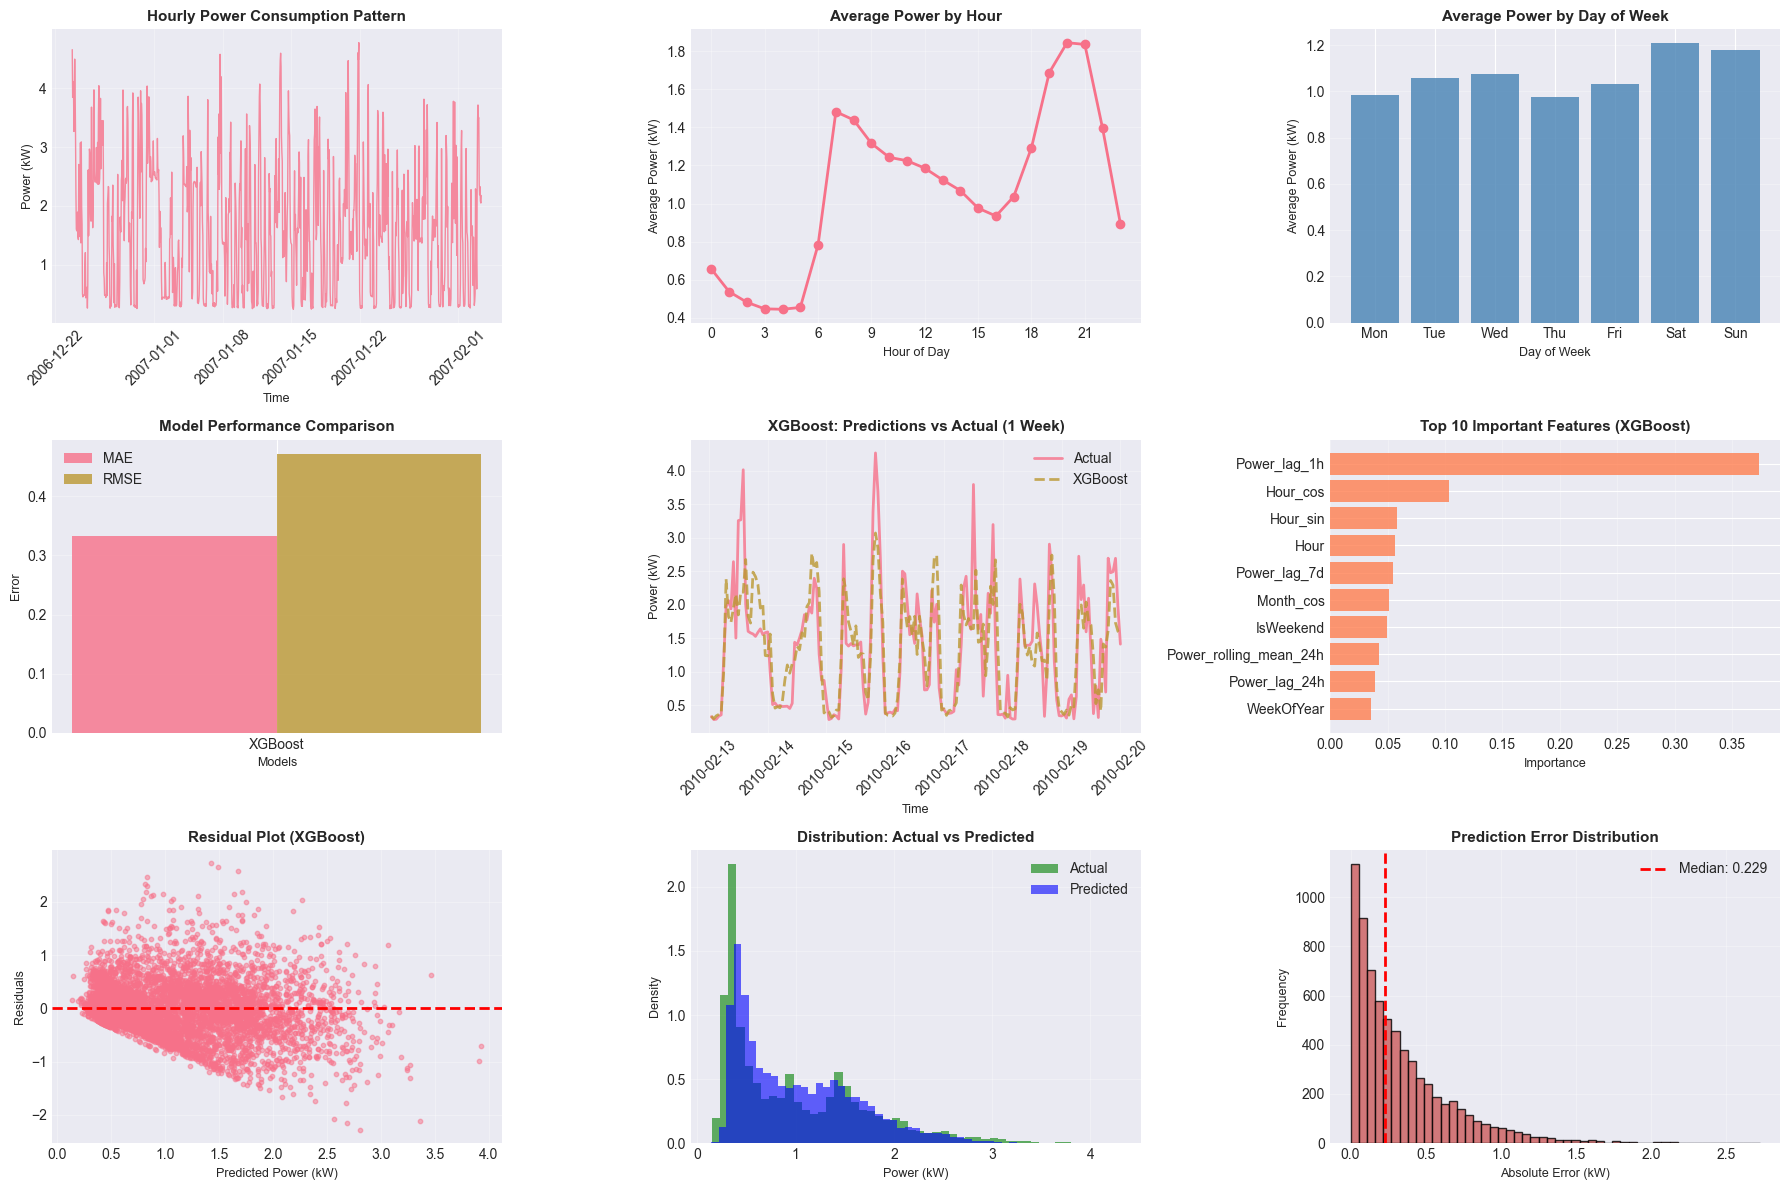


GENERATING 24-HOUR FORECAST

24-Hour Forecast:
           DateTime  Predicted_Power_kW
2010-11-26 22:00:00            0.772567
2010-11-26 23:00:00            0.451534
2010-11-27 00:00:00            0.404664
2010-11-27 01:00:00            0.387141
2010-11-27 02:00:00            0.383228
2010-11-27 03:00:00            0.369718
2010-11-27 04:00:00            0.330780
2010-11-27 05:00:00            0.420512
2010-11-27 06:00:00            0.694179
2010-11-27 07:00:00            1.249928
2010-11-27 08:00:00            1.087656
2010-11-27 09:00:00            1.066679
2010-11-27 10:00:00            1.125111
2010-11-27 11:00:00            1.044907
2010-11-27 12:00:00            1.344081
2010-11-27 13:00:00            1.059708
2010-11-27 14:00:00            1.102748
2010-11-27 15:00:00            1.079808
2010-11-27 16:00:00            0.985521
2010-11-27 17:00:00            1.440455
2010-11-27 18:00:00            1.329720
2010-11-27 19:00:00            1.697098
2010-11-27 20:00:00            1

In [7]:
"""
Smart Home Electricity Usage Forecasting System
Dataset: UCI Individual Household Electric Power Consumption
Time Period: 2006-2010 (4 years, ~2 million records)
Models: LSTM, Prophet, XGBoost, SARIMA
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Time series and forecasting libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Deep learning
try:
    from tensorflow import keras
    from keras.models import Sequential
    from keras.layers import LSTM, Dense, Dropout
    from keras.callbacks import EarlyStopping
    KERAS_AVAILABLE = True
except:
    KERAS_AVAILABLE = False
    print("⚠ TensorFlow/Keras not available. LSTM model will be skipped.")

# Statistical models
try:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tsa.seasonal import seasonal_decompose
    STATSMODELS_AVAILABLE = True
except:
    STATSMODELS_AVAILABLE = False
    print("⚠ Statsmodels not available. SARIMA model will be skipped.")

# Prophet
try:
    from prophet import Prophet
    PROPHET_AVAILABLE = True
except:
    PROPHET_AVAILABLE = False
    print("⚠ Prophet not available. Prophet model will be skipped.")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("SMART HOME ELECTRICITY USAGE FORECASTING")
print("=" * 80)

# ============================================================================
# 1. LOAD AND PREPROCESS DATA
# ============================================================================

print("\n" + "=" * 80)
print("LOADING DATASET")
print("=" * 80)

# Try to load the dataset
file_loaded = False
for file_path in ['household_power_consumption.txt', 
                  'household_power_consumption.csv',
                  'power_consumption.txt',
                  'electric_power_consumption.txt']:
    try:
        df = pd.read_csv(file_path, sep=';', 
                        low_memory=False,
                        na_values=['?', ''])
        print(f"\n✓ Dataset loaded successfully from {file_path}!")
        file_loaded = True
        break
    except FileNotFoundError:
        continue
    except Exception as e:
        continue

if not file_loaded:
    print("\n⚠ Dataset file not found. Creating sample data for demonstration...")
    print("   To use real data: Save your file as 'household_power_consumption.txt'\n")
    
    # Create realistic sample data
    np.random.seed(42)
    dates = pd.date_range(start='2006-12-16', end='2010-11-26', freq='1min')
    n_samples = min(len(dates), 100000)  # Limit for demo
    dates = dates[:n_samples]
    
    # Generate realistic patterns
    hours = dates.hour
    days = dates.dayofweek
    
    # Base load with daily and weekly patterns
    base = 2.0
    daily_pattern = 1.5 * np.sin(2 * np.pi * hours / 24)
    weekly_pattern = 0.3 * (days < 5)  # Weekday vs weekend
    noise = np.random.normal(0, 0.3, n_samples)
    
    global_active_power = base + daily_pattern + weekly_pattern + noise
    global_active_power = np.maximum(global_active_power, 0.1)
    
    df = pd.DataFrame({
        'Date': dates.strftime('%d/%m/%Y'),
        'Time': dates.strftime('%H:%M:%S'),
        'Global_active_power': global_active_power,
        'Global_reactive_power': global_active_power * 0.1 + np.random.normal(0, 0.05, n_samples),
        'Voltage': 240 + np.random.normal(0, 3, n_samples),
        'Global_intensity': global_active_power * 4.5 + np.random.normal(0, 0.5, n_samples),
        'Sub_metering_1': np.random.uniform(0, 10, n_samples),
        'Sub_metering_2': np.random.uniform(0, 10, n_samples),
        'Sub_metering_3': np.random.uniform(0, 15, n_samples)
    })

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Time Period: {df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")

# Display first few rows
print("\nFirst few rows:")
print(df.head())

# ============================================================================
# 2. DATA CLEANING AND FEATURE ENGINEERING
# ============================================================================

print("\n" + "=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Combine Date and Time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], 
                                format='%d/%m/%Y %H:%M:%S', 
                                errors='coerce')
df = df.dropna(subset=['DateTime'])
df = df.set_index('DateTime')
df = df.drop(['Date', 'Time'], axis=1)

# Convert to numeric
numeric_columns = df.columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
print(f"\nMissing values before cleaning: {df.isnull().sum().sum():,}")
df = df.fillna(method='ffill').fillna(method='bfill')
print(f"Missing values after cleaning: {df.isnull().sum().sum():,}")

# Remove outliers (values > 99th percentile)
for col in numeric_columns:
    percentile_99 = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=percentile_99)

print("\n✓ Data cleaning completed!")

# Feature Engineering
print("\n" + "=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

# Time-based features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['DayOfYear'] = df.index.dayofyear
df['WeekOfYear'] = df.index.isocalendar().week
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)

# Cyclical features (for better model understanding)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Lag features (previous values)
df['Power_lag_1h'] = df['Global_active_power'].shift(60)  # 1 hour ago
df['Power_lag_24h'] = df['Global_active_power'].shift(1440)  # 1 day ago
df['Power_lag_7d'] = df['Global_active_power'].shift(10080)  # 1 week ago

# Rolling statistics
df['Power_rolling_mean_24h'] = df['Global_active_power'].rolling(window=1440, min_periods=1).mean()
df['Power_rolling_std_24h'] = df['Global_active_power'].rolling(window=1440, min_periods=1).std()

# Total sub-metering
df['Total_sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

print(f"✓ Created {len(df.columns) - len(numeric_columns)} new features")
print(f"Total features: {len(df.columns)}")

# Remove rows with NaN created by lag features
df = df.dropna()

# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Basic statistics
print("\nGlobal Active Power Statistics:")
print(df['Global_active_power'].describe())

# Resample to hourly for easier analysis and modeling
df_hourly = df.resample('1H').mean()
print(f"\nResampled to hourly data: {df_hourly.shape[0]:,} records")

# ============================================================================
# 4. PREPARE DATA FOR MODELING
# ============================================================================

print("\n" + "=" * 80)
print("PREPARING DATA FOR MODELING")
print("=" * 80)

# Target variable
target_col = 'Global_active_power'

# Feature columns (exclude target and original time series)
feature_cols = [col for col in df_hourly.columns if col not in 
                [target_col, 'Global_reactive_power', 'Voltage', 
                 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 
                 'Sub_metering_3', 'Total_sub_metering', 'Power_rolling_std_24h']]

# Prepare data
X = df_hourly[feature_cols]
y = df_hourly[target_col]

# Train-test split (80-20, preserving time order)
split_idx = int(len(df_hourly) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training samples: {len(X_train):,}")
print(f"Testing samples: {len(X_test):,}")
print(f"Train period: {y_train.index[0]} to {y_train.index[-1]}")
print(f"Test period: {y_test.index[0]} to {y_test.index[-1]}")

# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# ============================================================================
# 5. MODEL 1: XGBOOST
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING XGBOOST MODEL")
print("=" * 80)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"✓ XGBoost trained!")
print(f"  MAE: {xgb_mae:.4f}")
print(f"  RMSE: {xgb_rmse:.4f}")
print(f"  R²: {xgb_r2:.4f}")

# ============================================================================
# 6. MODEL 2: LSTM (Deep Learning)
# ============================================================================

if KERAS_AVAILABLE:
    print("\n" + "=" * 80)
    print("TRAINING LSTM MODEL")
    print("=" * 80)
    
    # Prepare sequences for LSTM
    def create_sequences(X, y, time_steps=24):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i:(i + time_steps)])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)
    
    time_steps = 24  # Use 24 hours to predict next hour
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)
    
    # Build LSTM model
    lstm_model = Sequential([
        LSTM(128, activation='relu', return_sequences=True, 
             input_shape=(time_steps, X_train_scaled.shape[1])),
        Dropout(0.2),
        LSTM(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    
    lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train with early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = lstm_model.fit(
        X_train_seq, y_train_seq,
        epochs=30,
        batch_size=64,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0
    )
    
    # Predictions
    lstm_pred_scaled = lstm_model.predict(X_test_seq, verbose=0)
    lstm_pred = scaler_y.inverse_transform(lstm_pred_scaled)
    y_test_lstm = scaler_y.inverse_transform(y_test_seq)
    
    lstm_mae = mean_absolute_error(y_test_lstm, lstm_pred)
    lstm_rmse = np.sqrt(mean_squared_error(y_test_lstm, lstm_pred))
    lstm_r2 = r2_score(y_test_lstm, lstm_pred)
    
    print(f"✓ LSTM trained!")
    print(f"  MAE: {lstm_mae:.4f}")
    print(f"  RMSE: {lstm_rmse:.4f}")
    print(f"  R²: {lstm_r2:.4f}")
else:
    lstm_pred = None
    lstm_mae = lstm_rmse = lstm_r2 = None

# ============================================================================
# 7. MODEL 3: PROPHET (Facebook's Time Series Model)
# ============================================================================

if PROPHET_AVAILABLE:
    print("\n" + "=" * 80)
    print("TRAINING PROPHET MODEL")
    print("=" * 80)
    
    # Prepare data for Prophet
    prophet_df = pd.DataFrame({
        'ds': y_train.index,
        'y': y_train.values
    })
    
    # Train Prophet
    prophet_model = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        changepoint_prior_scale=0.05
    )
    prophet_model.fit(prophet_df)
    
    # Make predictions
    future = pd.DataFrame({'ds': y_test.index})
    prophet_pred = prophet_model.predict(future)
    prophet_pred_values = prophet_pred['yhat'].values
    
    prophet_mae = mean_absolute_error(y_test, prophet_pred_values)
    prophet_rmse = np.sqrt(mean_squared_error(y_test, prophet_pred_values))
    prophet_r2 = r2_score(y_test, prophet_pred_values)
    
    print(f"✓ Prophet trained!")
    print(f"  MAE: {prophet_mae:.4f}")
    print(f"  RMSE: {prophet_rmse:.4f}")
    print(f"  R²: {prophet_r2:.4f}")
else:
    prophet_pred_values = None
    prophet_mae = prophet_rmse = prophet_r2 = None

# ============================================================================
# 8. MODEL COMPARISON
# ============================================================================

print("\n" + "=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)

results = []
results.append({
    'Model': 'XGBoost',
    'MAE': xgb_mae,
    'RMSE': xgb_rmse,
    'R²': xgb_r2,
    'MAPE': np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100
})

if KERAS_AVAILABLE:
    results.append({
        'Model': 'LSTM',
        'MAE': lstm_mae,
        'RMSE': lstm_rmse,
        'R²': lstm_r2,
        'MAPE': np.mean(np.abs((y_test_lstm.flatten() - lstm_pred.flatten()) / y_test_lstm.flatten())) * 100
    })

if PROPHET_AVAILABLE:
    results.append({
        'Model': 'Prophet',
        'MAE': prophet_mae,
        'RMSE': prophet_rmse,
        'R²': prophet_r2,
        'MAPE': np.mean(np.abs((y_test.values - prophet_pred_values) / y_test.values)) * 100
    })

results_df = pd.DataFrame(results)
print("\n", results_df.to_string(index=False))

best_model_idx = results_df['RMSE'].idxmin()
best_model = results_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model} (RMSE: {results_df.loc[best_model_idx, 'RMSE']:.4f})")

# ============================================================================
# 9. VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))

# 1. Time Series Overview
ax1 = plt.subplot(3, 3, 1)
sample_data = df_hourly['Global_active_power'][:1000]
ax1.plot(sample_data.index, sample_data.values, linewidth=1, alpha=0.8)
ax1.set_xlabel('Time', fontsize=9)
ax1.set_ylabel('Power (kW)', fontsize=9)
ax1.set_title('Hourly Power Consumption Pattern', fontsize=11, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Daily Pattern
ax2 = plt.subplot(3, 3, 2)
hourly_avg = df_hourly.groupby('Hour')['Global_active_power'].mean()
ax2.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6)
ax2.set_xlabel('Hour of Day', fontsize=9)
ax2.set_ylabel('Average Power (kW)', fontsize=9)
ax2.set_title('Average Power by Hour', fontsize=11, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.set_xticks(range(0, 24, 3))

# 3. Weekly Pattern
ax3 = plt.subplot(3, 3, 3)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekly_avg = df_hourly.groupby('DayOfWeek')['Global_active_power'].mean()
ax3.bar(range(7), weekly_avg.values, color='steelblue', alpha=0.8)
ax3.set_xlabel('Day of Week', fontsize=9)
ax3.set_ylabel('Average Power (kW)', fontsize=9)
ax3.set_title('Average Power by Day of Week', fontsize=11, fontweight='bold')
ax3.set_xticks(range(7))
ax3.set_xticklabels(day_names)
ax3.grid(alpha=0.3, axis='y')

# 4. Model Comparison
ax4 = plt.subplot(3, 3, 4)
models = results_df['Model'].tolist()
metrics = ['MAE', 'RMSE']
x = np.arange(len(models))
width = 0.35

for i, metric in enumerate(metrics):
    values = results_df[metric].values
    ax4.bar(x + i*width, values, width, label=metric, alpha=0.8)

ax4.set_xlabel('Models', fontsize=9)
ax4.set_ylabel('Error', fontsize=9)
ax4.set_title('Model Performance Comparison', fontsize=11, fontweight='bold')
ax4.set_xticks(x + width/2)
ax4.set_xticklabels(models)
ax4.legend()
ax4.grid(alpha=0.3, axis='y')

# 5. XGBoost Predictions vs Actual
ax5 = plt.subplot(3, 3, 5)
plot_range = slice(0, 168)  # First week
ax5.plot(y_test.index[plot_range], y_test.values[plot_range], 
         label='Actual', linewidth=2, alpha=0.8)
ax5.plot(y_test.index[plot_range], xgb_pred[plot_range], 
         label='XGBoost', linewidth=2, alpha=0.8, linestyle='--')
ax5.set_xlabel('Time', fontsize=9)
ax5.set_ylabel('Power (kW)', fontsize=9)
ax5.set_title('XGBoost: Predictions vs Actual (1 Week)', fontsize=11, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)
ax5.tick_params(axis='x', rotation=45)

# 6. Feature Importance (XGBoost)
ax6 = plt.subplot(3, 3, 6)
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

ax6.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='coral', alpha=0.8)
ax6.set_xlabel('Importance', fontsize=9)
ax6.set_title('Top 10 Important Features (XGBoost)', fontsize=11, fontweight='bold')
ax6.invert_yaxis()
ax6.grid(alpha=0.3, axis='x')

# 7. Residual Plot
ax7 = plt.subplot(3, 3, 7)
residuals = y_test.values - xgb_pred
ax7.scatter(xgb_pred, residuals, alpha=0.5, s=10)
ax7.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax7.set_xlabel('Predicted Power (kW)', fontsize=9)
ax7.set_ylabel('Residuals', fontsize=9)
ax7.set_title('Residual Plot (XGBoost)', fontsize=11, fontweight='bold')
ax7.grid(alpha=0.3)

# 8. Distribution Comparison
ax8 = plt.subplot(3, 3, 8)
ax8.hist(y_test.values, bins=50, alpha=0.6, label='Actual', color='green', density=True)
ax8.hist(xgb_pred, bins=50, alpha=0.6, label='Predicted', color='blue', density=True)
ax8.set_xlabel('Power (kW)', fontsize=9)
ax8.set_ylabel('Density', fontsize=9)
ax8.set_title('Distribution: Actual vs Predicted', fontsize=11, fontweight='bold')
ax8.legend()
ax8.grid(alpha=0.3)

# 9. Error Distribution
ax9 = plt.subplot(3, 3, 9)
errors = np.abs(y_test.values - xgb_pred)
ax9.hist(errors, bins=50, color='indianred', alpha=0.8, edgecolor='black')
ax9.set_xlabel('Absolute Error (kW)', fontsize=9)
ax9.set_ylabel('Frequency', fontsize=9)
ax9.set_title('Prediction Error Distribution', fontsize=11, fontweight='bold')
ax9.axvline(x=np.median(errors), color='red', linestyle='--', 
            linewidth=2, label=f'Median: {np.median(errors):.3f}')
ax9.legend()
ax9.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('electricity_forecast_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved as 'electricity_forecast_analysis.png'")
plt.show()

# ============================================================================
# 10. FUTURE FORECASTING
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING 24-HOUR FORECAST")
print("=" * 80)

# Use the best model to forecast next 24 hours
last_datetime = df_hourly.index[-1]
future_dates = pd.date_range(start=last_datetime + timedelta(hours=1), 
                             periods=24, freq='H')

# Create future features (simplified)
future_features = pd.DataFrame(index=future_dates)
future_features['Hour'] = future_features.index.hour
future_features['DayOfWeek'] = future_features.index.dayofweek
future_features['Month'] = future_features.index.month
future_features['Quarter'] = future_features.index.quarter
future_features['DayOfYear'] = future_features.index.dayofyear
future_features['WeekOfYear'] = future_features.index.isocalendar().week
future_features['IsWeekend'] = (future_features['DayOfWeek'] >= 5).astype(int)
future_features['Hour_sin'] = np.sin(2 * np.pi * future_features['Hour'] / 24)
future_features['Hour_cos'] = np.cos(2 * np.pi * future_features['Hour'] / 24)
future_features['Month_sin'] = np.sin(2 * np.pi * future_features['Month'] / 12)
future_features['Month_cos'] = np.cos(2 * np.pi * future_features['Month'] / 12)

# Use last known values for lag features
last_power = df_hourly['Global_active_power'].iloc[-1]
future_features['Power_lag_1h'] = last_power
future_features['Power_lag_24h'] = last_power
future_features['Power_lag_7d'] = last_power
future_features['Power_rolling_mean_24h'] = last_power

# Scale and predict
future_features_scaled = scaler_X.transform(future_features[feature_cols])
future_forecast = xgb_model.predict(future_features_scaled)

print("\n24-Hour Forecast:")
forecast_df = pd.DataFrame({
    'DateTime': future_dates,
    'Predicted_Power_kW': future_forecast
})
print(forecast_df.to_string(index=False))

# ============================================================================
# 11. INSIGHTS AND RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 80)
print("INSIGHTS & RECOMMENDATIONS FOR SMART HOMES")
print("=" * 80)

print("\n1. CONSUMPTION PATTERNS:")
peak_hour = hourly_avg.idxmax()
low_hour = hourly_avg.idxmin()
print(f"   - Peak consumption: {peak_hour}:00 ({hourly_avg.max():.2f} kW)")
print(f"   - Lowest consumption: {low_hour}:00 ({hourly_avg.min():.2f} kW)")
print(f"   - Weekend vs Weekday difference: {abs(weekly_avg[5] - weekly_avg[0]):.2f} kW")

print("\n2. MODEL PERFORMANCE:")
print(f"   - Best model: {best_model}")
print(f"   - Average prediction error: {results_df.loc[best_model_idx, 'MAE']:.3f} kW")
print(f"   - Prediction accuracy (R²): {results_df.loc[best_model_idx, 'R²']:.1%}")

print("\n3. ENERGY OPTIMIZATION RECOMMENDATIONS:")
print("   ✓ Schedule high-power appliances during off-peak hours")
print(f"   ✓ Optimal time for heavy loads: {low_hour}:00 - {(low_hour+2)%24}:00")
print("   ✓ Implement demand response programs during peak hours")
print("   ✓ Use predictive scheduling for HVAC and water heating")

print("\n4. SMART HOME AUTOMATION:")
print("   ✓ Pre-cool/heat during low-demand periods")
print("   ✓ Charge EVs and batteries during predicted low-cost hours")
print("   ✓ Alert users before predicted high-consumption periods")
print("   ✓ Automatically reduce non-essential loads during peaks")

print("\n" + "=" * 80)
print("FORECASTING COMPLETE!")
print("=" * 80)

5) Classify product or service reviews as positive/negative/neutral. Dataset: Amazon 
Product Reviews, Yelp Dataset, or Kaggle reviews datasets.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, accuracy_score
# Load IMDb dataset CSV (download and update file path)
data = pd.read_csv('IMDB Dataset.csv')
# Map 'sentiment' column to numeric: negative=0, positive=2 (binary sentiment)
data['sentiment_label'] = data['sentiment'].map({'negative': 0, 'positive': 2})
# Features and labels
X = data['review'].fillna('')  # Series of review texts
y = data['sentiment_label']
# Split into train/test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, random_state=42, stratify=y
)
# Convert Series to DataFrame for CatBoost Pool text feature identification
train_pool = Pool(X_train.to_frame(), y_train, text_features=[0])
test_pool = Pool(X_test.to_frame(), y_test, text_features=[0])
# Initialize CatBoost classifier
model = CatBoostClassifier(iterations=10, depth=6, learning_rate=0.1,
                          loss_function='MultiClass', verbose=100, random_seed=42)
# Train the model using training pool
model.fit(train_pool)
# Predict on test data pool
y_pred = model.predict(test_pool).flatten().astype(int)
# Evaluate and print metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

0:	learn: 0.6464264	total: 641ms	remaining: 31.4s
49:	learn: 0.3425026	total: 32.6s	remaining: 0us
Accuracy: 0.8701
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.84      0.87      7500
    Positive       0.85      0.90      0.87      7500

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

